# Chapter 1 Exploratory Data Analysis

In [1]:
import os
os.chdir(r'D:\cs\data_ml_f\1\1\1cs\data\0\data')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
state = pd.read_csv('state.csv')
state.head(3)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ


In [4]:
state['Population'].mean()

6162876.3

In [5]:
# trim=0.1 drops 10% from each end
stats.trim_mean(state['Population'], 0.1)

4783697.125

In [6]:
# 加权平均值 weighted mean
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [7]:
# 加权中位数 weighted median
import wquantiles

wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

---

Some Terms:
* Deviations = errors, residuals
* Mean absolute deviation = l1-norm, Manhattan norm
* Percentile = quantile
* Interquartile range = IQR  
    The difference between the 75th percentile and the 25th percentile.

The variance, the standard deviation and the mean absolute deviation is **not robust to outliers and extreme values**.<br>
The variance and standard deviation are especially sensitive to outliers since they are based on the squared deviations.  
A robust estimate of variability is the **median absolute deviation from the median or MAD**.

In [8]:
from statsmodels import robust

In [9]:
print(robust.scale.mad(state['Population']))

3849876.1459979336


---

Exploring the Data Distribution

In [10]:
# 分位数
# 同义词：p quantile = 100p percentile（p分位数 = 100p百分位数）
# 例如：0.05分位数 = 5百分位数
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population(millions)')

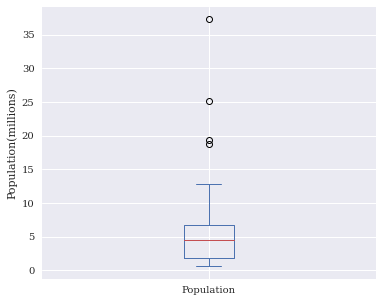

In [11]:
# 箱体图的最上面和最下面的横线代表Q3+1.5IQR，Q1-1.5IQR
# review: IQR = 0.75 quantile - 0.25 quantile
ax = (state['Population'] / 1_000_000).plot.box(figsize=(6, 5))
ax.set_ylabel('Population(millions)')

In [12]:
# frequency tables
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

有意思的是，quantiles和frequency tables都是将数据分组.  
**quantiles中每组内部的数据量相同，但组间距可能不同；**  
**frequence tables则是组间距相同，但数据量可能不同.**

---

histogram

<AxesSubplot:ylabel='Frequency'>

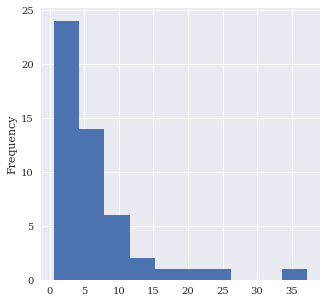

In [13]:
(state['Population'] / 1_000_000).plot.hist(figsize=(5, 5))

<AxesSubplot:ylabel='Density'>

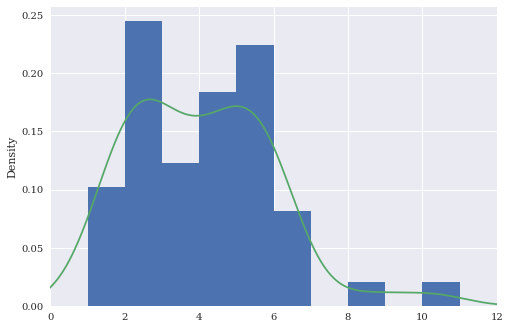

In [14]:
state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.kde()

<AxesSubplot:xlabel='Murder.Rate', ylabel='Density'>

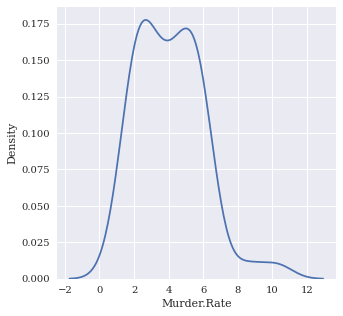

In [15]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(1,1,1)

sns.kdeplot(state['Murder.Rate'], ax=ax)

---

Exploring Binary and Categorical Data

In [16]:
dfw = pd.read_csv('dfw_airline.csv')
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


<AxesSubplot:>

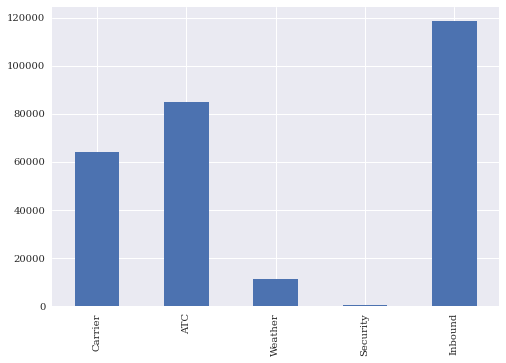

In [17]:
dfw.T.plot.bar(legend=False)

In [18]:
sp500_sym = pd.read_csv('sp500_sectors.csv')
sp500_px = pd.read_csv('sp500_data.csv', index_col=0,
                      parse_dates=True, infer_datetime_format=True)

In [19]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.corr()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.785865,0.888865,0.869680,0.056554,-0.468196,0.236881,0.782380,0.650054,0.798080,0.380809,0.784144,0.374000,0.663022,0.600424,0.787340,0.777773
QQQ,0.785865,1.000000,0.908995,0.834440,0.043553,-0.470555,0.199492,0.810158,0.560044,0.839701,0.346667,0.713463,0.421790,0.775392,0.614806,0.752771,0.945126
SPY,0.888865,0.908995,1.000000,0.953726,0.078722,-0.547074,0.272069,0.833937,0.713300,0.887028,0.481928,0.826053,0.406181,0.811269,0.744466,0.883616,0.886588
DIA,0.869680,0.834440,0.953726,1.000000,0.051523,-0.511327,0.256793,0.758012,0.658311,0.847043,0.463364,0.787415,0.383928,0.771044,0.753725,0.860556,0.842757
GLD,0.056554,0.043553,0.078722,0.051523,1.000000,-0.107488,0.216563,0.070110,0.188625,0.017467,0.121611,0.184366,-0.042233,-0.010200,0.033047,0.043039,0.053022
VXX,-0.468196,-0.470555,-0.547074,-0.511327,-0.107488,1.000000,-0.195397,-0.448942,-0.448474,-0.474756,-0.260395,-0.470890,-0.205661,-0.380925,-0.416913,-0.514365,-0.477258
USO,0.236881,0.199492,0.272069,0.256793,0.216563,-0.195397,1.000000,0.249799,0.525943,0.183275,0.113182,0.324166,0.078796,0.119500,0.116857,0.221760,0.225962
IWM,0.782380,0.810158,0.833937,0.758012,0.070110,-0.448942,0.249799,1.000000,0.586991,0.779750,0.325003,0.701533,0.387274,0.664288,0.537065,0.756282,0.760438
XLE,0.650054,0.560044,0.713300,0.658311,0.188625,-0.448474,0.525943,0.586991,1.000000,0.578956,0.337942,0.689778,0.260463,0.454457,0.413486,0.599129,0.559324
XLY,0.798080,0.839701,0.887028,0.847043,0.017467,-0.474756,0.183275,0.779750,0.578956,1.000000,0.366827,0.721232,0.370299,0.702860,0.663055,0.782053,0.772189


可以看到，因为数据量大，直接查看相关系数矩阵是不方便的.  
一个解决办法是查看由该矩阵创建的热点图(heatmap)：

<AxesSubplot:>

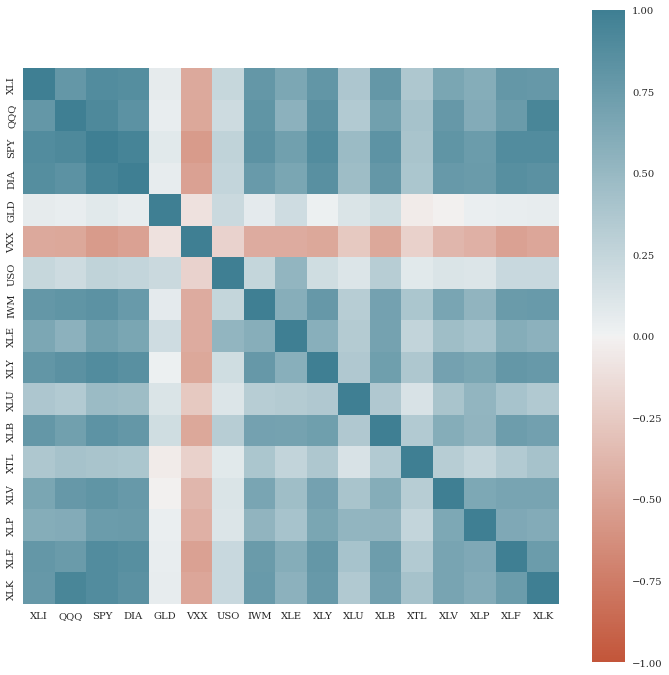

In [20]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1)

# sns.diverging_palette(20, 220, as_cmap=True) 用于设置热点图的颜色，但设置规则我暂时不清楚
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            square=True,annot=False, 
            cmap=sns.diverging_palette(20, 220, as_cmap=True))
#'cubehelix'
#sns.diverging_palette(20, 220, as_cmap=True)

---

In [21]:
kc_tax = pd.read_csv('kc_tax.csv')
kc_tax0 = kc_tax.loc[(kc_tax['TaxAssessedValue'] < 750000) & 
                     (kc_tax['SqFtTotLiving'] > 100) &
                     (kc_tax['SqFtTotLiving'] < 3500), :]
print(kc_tax0.shape)

(432693, 3)


For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense

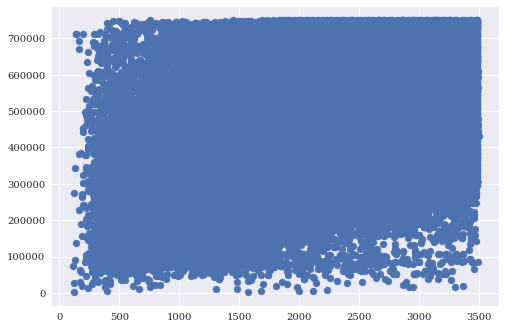

In [22]:
plt.scatter(kc_tax0['SqFtTotLiving'], kc_tax0['TaxAssessedValue'])

Hexagonal Binning is another way to manage the problem of having to many points that start to overlap. Hexagonal binning plots density, rather than points. Points are binned into gridded hexagons and distribution (the number of points per hexagon) is displayed using either the color or the area of the hexagons.This technique was first described in 1987 (D.B.Carr et al. Scatterplot Matrix Techniques for large N, Journal of the American Statistical Association, No.389 pp 424-436).[origin](https://datavizproject.com/data-type/hexagonal-binning/)

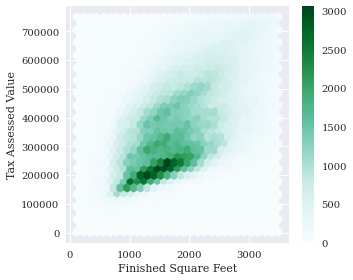

In [23]:
# gridsize: The number of hexagons in the x-direction
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

# Adjust the padding between and around subplots.
plt.tight_layout()
plt.show()

---

Two Categorical Variables

In [24]:
lc_loans = pd.read_csv('lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [25]:
# Table 1-8(1)
# pd.pivot_table: Create a spreadsheet-style pivot table as a DataFrame.
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [26]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = \
    df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [27]:
airline_stats = pd.read_csv('airline_stats.csv')

airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


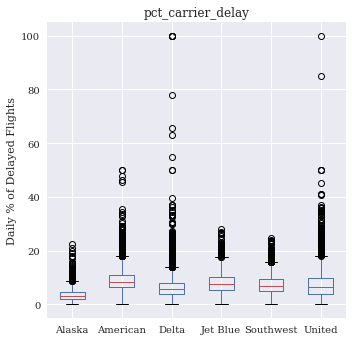

In [28]:
# The pandas boxplot method takes the 'by' argument that splits
# the data set into groups and creates the individual boxplots
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

A violin plot, is an enhancement to the boxplot and plots the density estimate with the density on the y-axis.  
The density is mirrored and flipped over, and the resulting shape is filled in, creating an image resembling a violin.

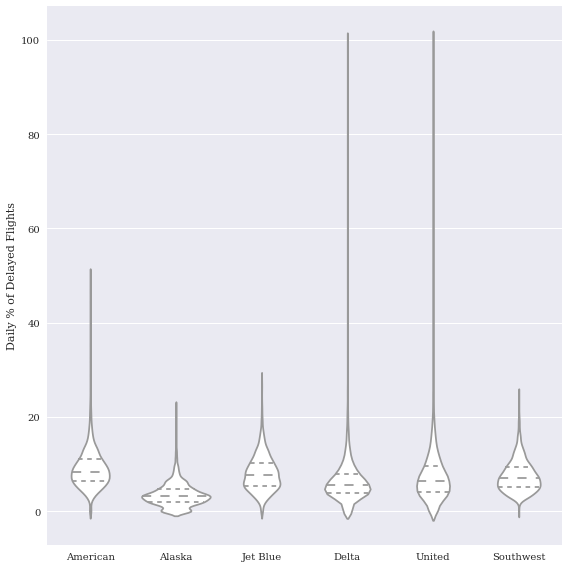

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

---

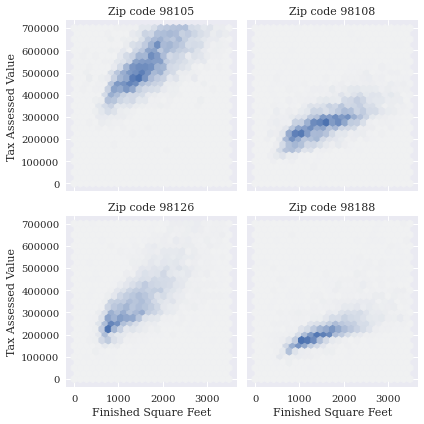

In [30]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0['ZipCode'].isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)

g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()